In [3]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Wine Dataset
columns = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
           'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
           'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, names=columns)

# Map target classes to numerical values (subtract 1 to start from 0)
df['target'] = df['target'] - 1

# Split data into features and labels
X = df.iloc[:, 1:].values  # Features
y = df['target'].values  # Target labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print("Wine dataset is loaded and preprocessed.")

Wine dataset is loaded and preprocessed.


Epoch 1/20, Loss: 1.0756
Epoch 2/20, Loss: 1.0469
Epoch 3/20, Loss: 1.0079
Epoch 4/20, Loss: 0.9529
Epoch 5/20, Loss: 0.8753
Epoch 6/20, Loss: 0.8059
Epoch 7/20, Loss: 0.7629
Epoch 8/20, Loss: 0.7318
Epoch 9/20, Loss: 0.7101
Epoch 10/20, Loss: 0.6762
Epoch 11/20, Loss: 0.6465
Epoch 12/20, Loss: 0.5957
Epoch 13/20, Loss: 0.5320
Epoch 14/20, Loss: 0.4664
Epoch 15/20, Loss: 0.4125
Epoch 16/20, Loss: 0.3711
Epoch 17/20, Loss: 0.3445
Epoch 18/20, Loss: 0.3195
Epoch 19/20, Loss: 0.3004
Epoch 20/20, Loss: 0.2766


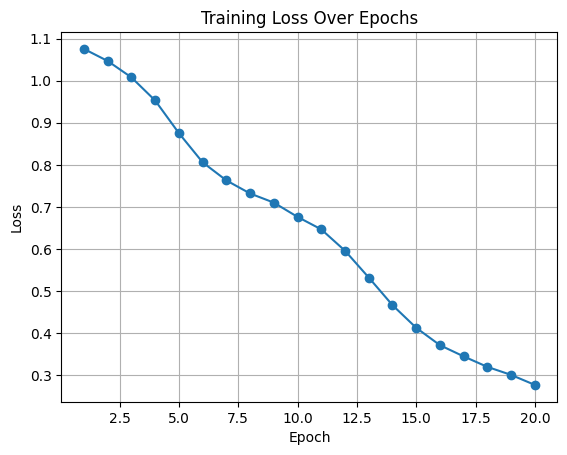

In [7]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
# Step 4: Train the Model and Collect Loss
epochs = 20
losses = []  # To store loss for each epoch

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    losses.append(epoch_loss)  # Store epoch loss
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# Plot Training Loss
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [8]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


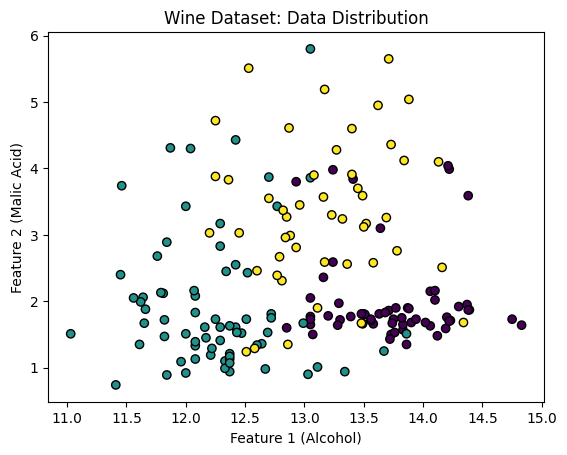

In [10]:
# Step 6: Visualize Data Distribution (Using the First Two Features)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1 (Alcohol)')
plt.ylabel('Feature 2 (Malic Acid)')
plt.title('Wine Dataset: Data Distribution')
plt.show()